In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/spam.csv")

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1211,ham,Ok then i will come to ur home after half an hour,NaN,NaN,NaN
2538,ham,The monthly amount is not that terrible and yo...,NaN,NaN,NaN
4691,ham,"By march ending, i should be ready. But will c...",NaN,NaN,NaN
351,ham,If you're not in my car in an hour and a half ...,NaN,NaN,NaN
4889,ham,Sounds like there could be a lot of time spent...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3952,spam,Refused a loan? Secured or Unsecured? Can't ge...
5441,ham,"By the way, make sure u get train to worc fore..."
4787,ham,Thanx. Yup we coming back on sun. Finish dinne...
3396,ham,Heehee that was so funny tho
5208,ham,Hi.what you think about match?


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1444,ham,Those ducking chinchillas
1581,ham,Hhahhaahahah rofl wtf nig was leonardo in your...
2838,ham,"Easy mate, * guess the quick drink was bit amb..."
5076,ham,"Guy, no flash me now. If you go call me, call ..."
509,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

,count
target,
0,4516
1,653


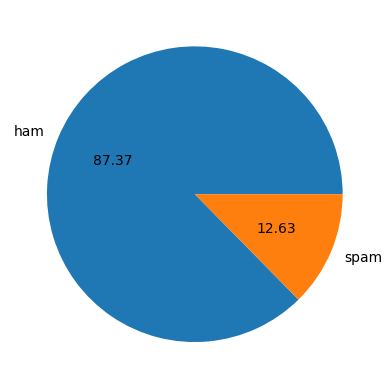

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [40]:
df['num_characters'] = df['text'].apply(len)

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:

!pip install nltk
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now the rest of the code that failed should work
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [49]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

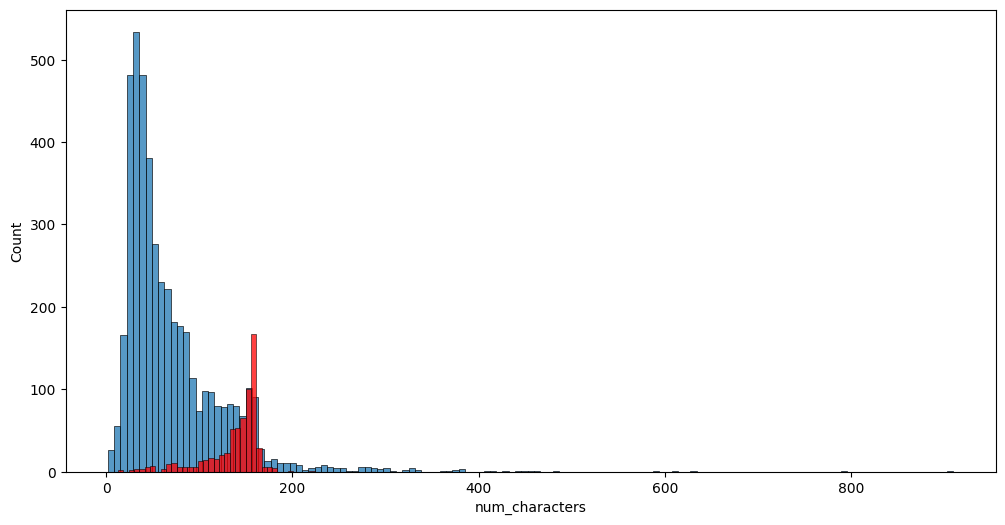

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

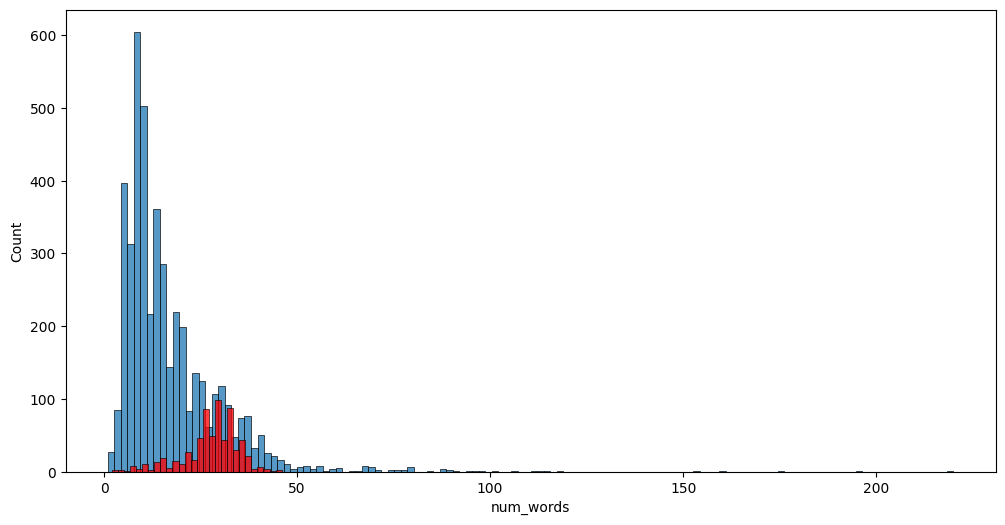

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

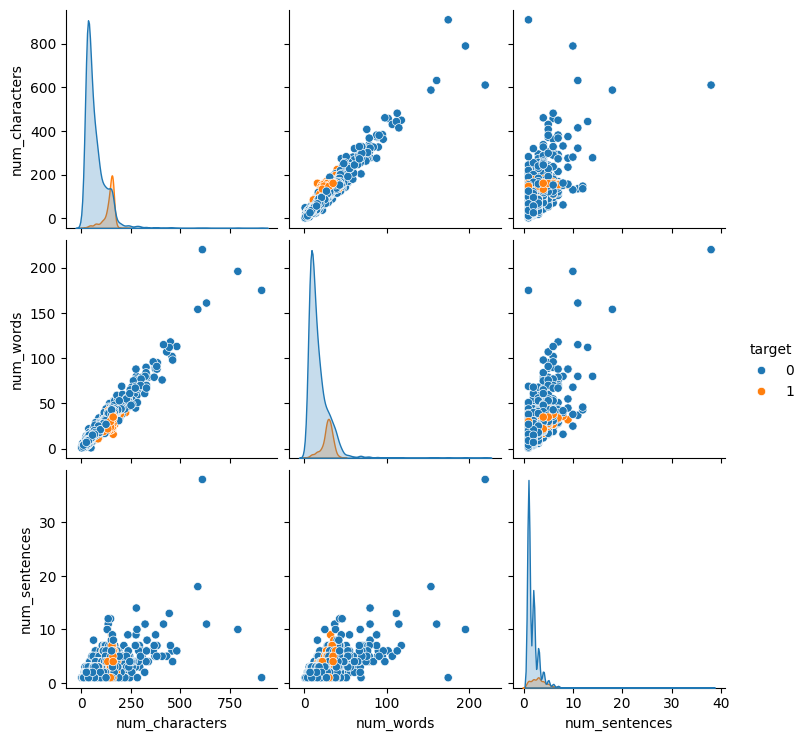

In [52]:
sns.pairplot(df,hue='target')

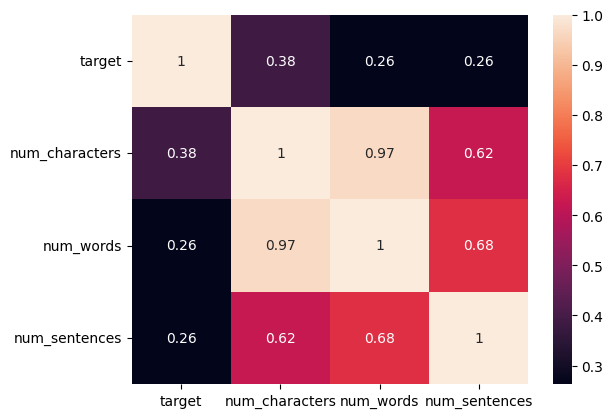

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show() # Show the plot

In [64]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)
    transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [65]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [72]:
# Install nltk
!pip install nltk
# Import necessary libraries from nltk, also import string.
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import string
# Download required nltk resources
nltk.download('stopwords')
nltk.download('punkt')
# Initialize PorterStemmer
ps = PorterStemmer()

# Define the transform_text function
def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize into words
    text = word_tokenize(text)

    y = []
    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Apply stemming
    for i in text:
        y.append(ps.stem(i))

    # Return the transformed text as a string
    return " ".join(y)

# Apply the transformation to the 'text' column of the DataFrame
df['transformed_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [75]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

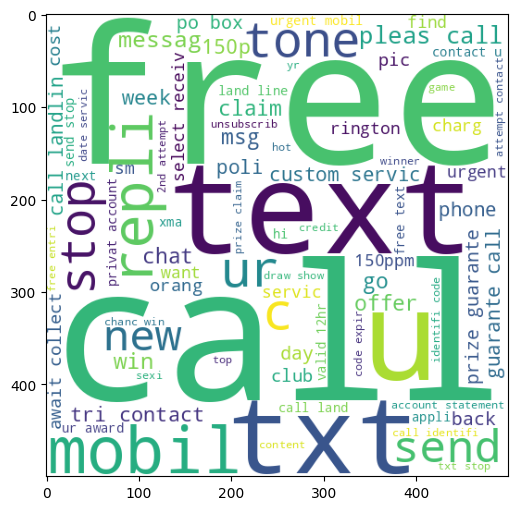

In [76]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [77]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

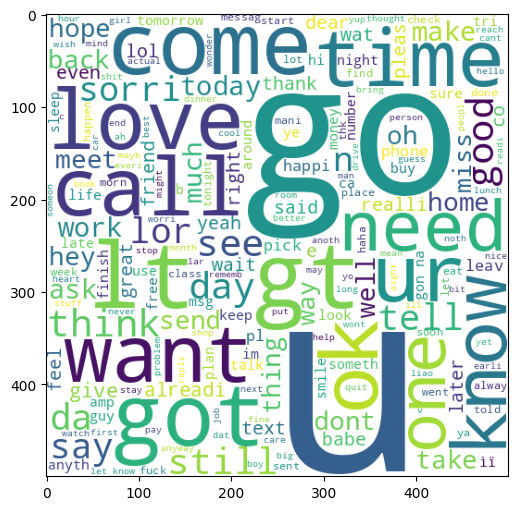

In [78]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [81]:
len(spam_corpus)

9939

<ipython-input-88-48eaeb5ce28a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')  # Add color palette here


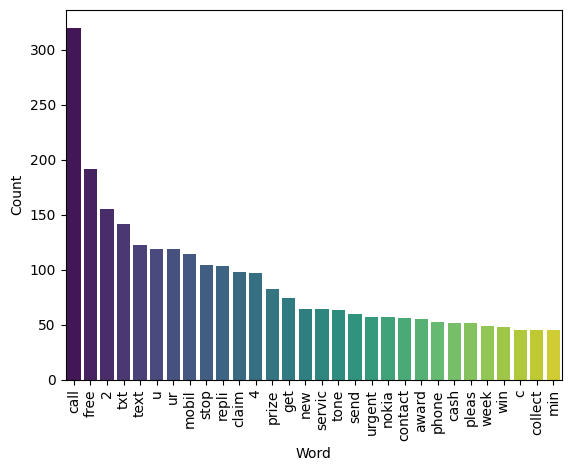

In [88]:
# Assuming spam_corpus is already defined from the previous cells
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Create a DataFrame from the most common words
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename the columns for better clarity
most_common_df.rename(columns={0: 'Word', 1: 'Count'}, inplace=True)

# Create the barplot using x and y named parameters
# x: The words (most_common_df['Word'])
# y: The counts (most_common_df['Count'])
# data: The data to use (most_common_df)
sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')  # Add color palette here

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [89]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [90]:
len(ham_corpus)

35404

In [95]:
# Print the first few entries in ham_corpus to confirm it's populated
print(ham_corpus[:10])  # Check the first 10 entries


[]


In [96]:
# Assuming 'df' is your DataFrame and it contains a column 'target' (0 for non-spam, 1 for spam)
# and a 'transformed_text' column (processed text of messages)

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():  # 0 for non-spam
    for word in msg.split():
        ham_corpus.append(word)

# Check if ham_corpus is populated
print(f"Number of non-spam words in ham_corpus: {len(ham_corpus)}")
print(ham_corpus[:10])  # Check the first 10 words


Number of non-spam words in ham_corpus: 35404
['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']


Number of non-spam words: 35404
['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']
DataFrame before renaming columns:      0    1
0    u  883
1   go  404
2  get  349
3   gt  288
4   lt  287


<ipython-input-98-a1c26e62e4eb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')


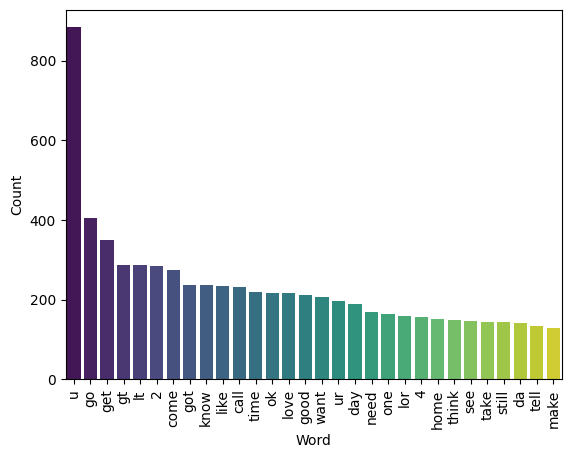

In [98]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains your dataset with a 'target' column (0 = non-spam, 1 = spam)
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Print the first few words in ham_corpus to confirm it's populated
print(f"Number of non-spam words: {len(ham_corpus)}")
print(ham_corpus[:10])

# Create a DataFrame from the most common words in the ham corpus
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Print the DataFrame to check the columns
print("DataFrame before renaming columns:", most_common_df.head())

# Rename the columns for clarity
most_common_df.columns = ['Word', 'Count']

# Create the barplot using Seaborn
sns.barplot(x='Word', y='Count', data=most_common_df, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [99]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [100]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [101]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [102]:
X.shape

(5169, 3000)

In [103]:
y = df['target'].values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [109]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [110]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [113]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [114]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [115]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [116]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [117]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [118]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [119]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [120]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


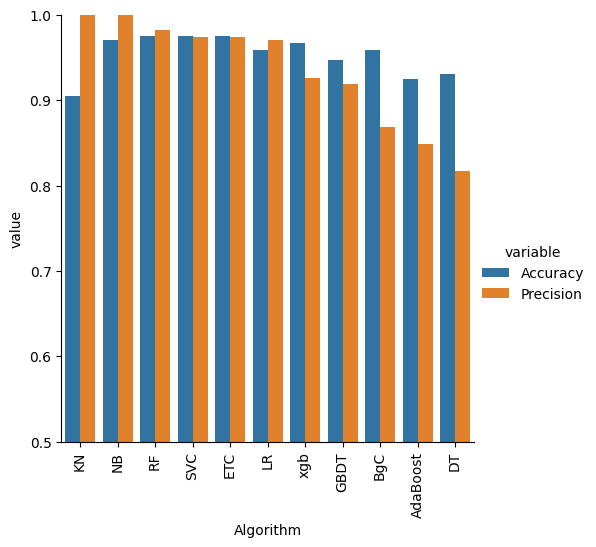

In [121]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [122]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [144]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [125]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [148]:
# Create performance_df with initial data
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Create temp_df with additional accuracy and precision metrics
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

# Merge performance_df with temp_df
new_df_scaled = performance_df.merge(temp_df, on='Algorithm')

# Add a new set of metrics
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
}).sort_values('Precision_scaling', ascending=False)

# Merge again with new metrics
new_df_scaled = new_df_scaled.merge(temp_df, on='Algorithm')

# Add another set of metrics based on num_characters
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

# Final merge
final_df = new_df_scaled.merge(temp_df, on='Algorithm')

# Print the resulting DataFrame
print(final_df)


   Algorithm  Accuracy  Precision  Accuracy_max_ft_3000  \
0         KN  0.905222   1.000000              0.905222   
1         NB  0.970986   1.000000              0.970986   
2         RF  0.975822   0.982906              0.975822   
3        SVC  0.975822   0.974790              0.975822   
4        ETC  0.974855   0.974576              0.974855   
5         LR  0.958414   0.970297              0.958414   
6        xgb  0.967118   0.926230              0.967118   
7       GBDT  0.946809   0.919192              0.946809   
8        BgC  0.958414   0.868217              0.958414   
9   AdaBoost  0.924565   0.848837              0.924565   
10        DT  0.930368   0.817308              0.930368   

    Precision_max_ft_3000  Accuracy_scaling  Precision_scaling  \
0                1.000000          0.905222           1.000000   
1                1.000000          0.970986           1.000000   
2                0.982906          0.975822           0.982906   
3                0.974790  

In [149]:
final_df.to_csv("model_comparison.csv", index=False)


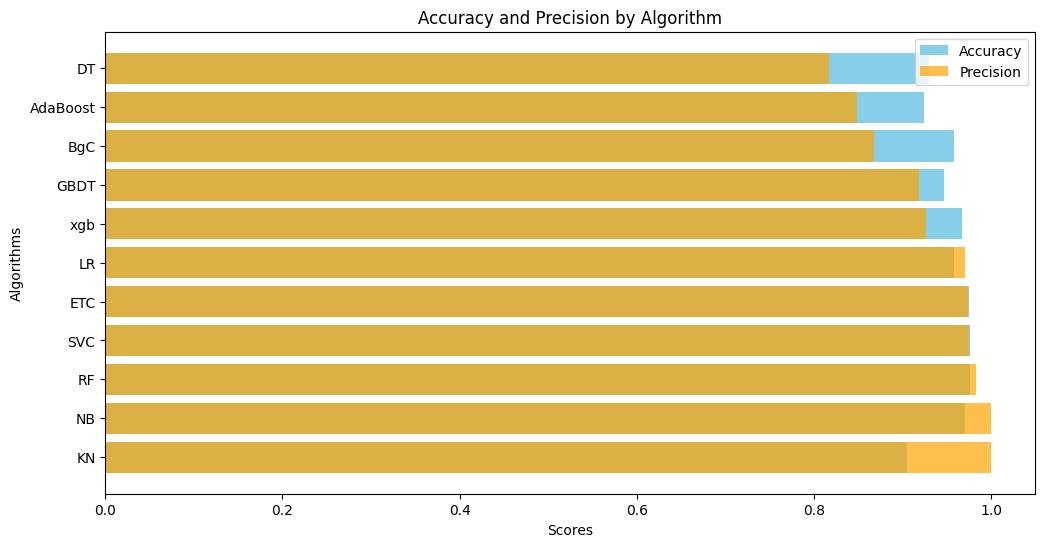

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(final_df['Algorithm'], final_df['Accuracy'], color='skyblue', label='Accuracy')
plt.barh(final_df['Algorithm'], final_df['Precision'], color='orange', alpha=0.7, label='Precision')
plt.xlabel("Scores")
plt.ylabel("Algorithms")
plt.title("Accuracy and Precision by Algorithm")
plt.legend()
plt.show()


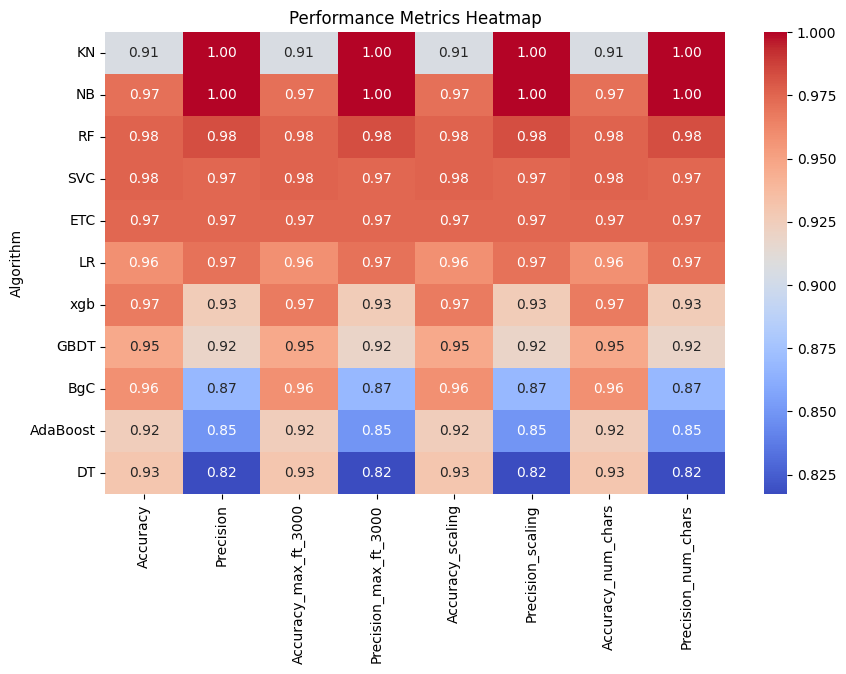

In [151]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(final_df.iloc[:, 1:].set_index(final_df['Algorithm']), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Performance Metrics Heatmap")
plt.show()


In [133]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [134]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [136]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [137]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [138]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [139]:
from sklearn.ensemble import StackingClassifier

In [140]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [141]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [143]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))